In [3]:
import pandas as pd 


df = pd.read_csv('breast_cancer.csv')
df.head()
print(df.shape)

(698, 11)


In [4]:
#The first column (0) is a sample identifier. It can be dropped.
df = pd.read_csv('breast_cancer.csv', header=None)
df = df.drop(df.columns[0], axis=1)


df.columns = ['thick', 'size_uni', 'shape_uni', 'marg_adh', 'size_sec', 'bare_nuc', 'bland_chromo', 'norm_chromo', 'mitosis', 'outcome']

#Remove any rows that contain missing values, denoted by a ‘?’ character.
#Cast all remaining values in your table to integers.
df = df[df.bare_nuc != '?']
df = df.astype(int)

#Change the outcome values from 2 (benign) to 0, and from 4 (malignant) to 1. 
df.outcome = df.outcome.replace(2, 0)
df.outcome = df.outcome.replace(4, 1)

df.head()
print(df.shape)

(683, 10)


In [5]:

import numpy as np
def metrics(actuals, predictions):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(actuals)):
        if actuals[i] == 1 and predictions[i] == 1:
            tp += 1
        elif actuals[i] == 1 and predictions[i] == 0:
            fn += 1
        elif actuals[i] == 0 and predictions[i] == 1:
            fp += 1
        elif actuals[i] == 0 and predictions[i] == 0:
            tn += 1

    acc = (tp + tn) / (tp + tn + fp + fn)
    sens = tp / (tp + fn)
    spec = tn / (tn + fp)
    prec = tp / (tp + fp)
    f1 = 2 * (prec * sens) / (prec + sens)

    return acc, sens, spec, prec, f1
    

    

#Implement a function predict(X, w) where X is a 2-dimensional array of attributes values
#and w = {w0, w1, ...w9} are the bias and coefficients (weights) of our model. The function
#returns a series of predictions (1 or 0), one value for each row in the table of attributes.

def predict(X, w):
    predictions = []
    bias = w[0]
    weights = w[1:]
    for i in range(X.shape[0]):
        z = bias + np.dot(X[i], weights)
        if z >= 0:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def random_weights(x):
    return [np.random.uniform(-1, 1) for i in range(x)]

# Implement the perceptron algorithm: perceptron(data, alpha, epochs).
#Your algorithm should receive a data table, the learning rate, and the number of epochs
#(iterations). The function returns the weight vector, w. When running the algorithm, I
#recommend you try setting alpha=0.0001, and epochs=1000.
def perceptron(data, learning_rate, epochs):
    weights = random_weights(data.shape[1])
    mpe_list = []
    acc_list = []
    for i in range(epochs):
        mpe = 0
        error = 0
        for row in data:
            features = row[:-1]
            label = row[-1]
            z = weights[0] + np.dot(weights[1:], features)
            if z >= 0:
                y_pred = 1
            else:
                y_pred = 0
            weights[1:] += learning_rate * (label - y_pred) * features
            weights[0] += learning_rate * (label - y_pred)
            error += np.abs(label - y_pred) * np.abs(z)
        mpe = error / len(data)
        mpe_list.append(mpe)
        y_pred = predict(data[:, :-1], weights)
        acc = metrics(data[:, -1], y_pred)[0]
        acc_list.append(acc)
    return weights, mpe_list, acc_list



    


In [6]:
#Report the five metrics for your model when run against the Wisconsin Breast Cancer
#dataset provided. 
 
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

train_data = df.sample(frac=0.8, random_state=0)
test_data = df.drop(train_data.index)

train_X = train_data.iloc[:, :-1].values
train_y = train_data.iloc[:, -1].values
test_X = test_data.iloc[:, :-1].values
test_y = test_data.iloc[:, -1].values

w, mpe_list, acc_list = perceptron(train_data.values, 0.0001, 1000)

ypred = predict(test_X, w)

accuracy, sensitivity, specificity, precision, f1 = metrics(test_y, ypred)

print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Precision: ', precision)
print('F1-score: ', f1)


Accuracy:  0.9562043795620438
Sensitivity:  0.94
Specificity:  0.9655172413793104
Precision:  0.94
F1-score:  0.94


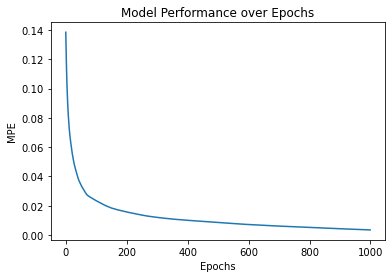

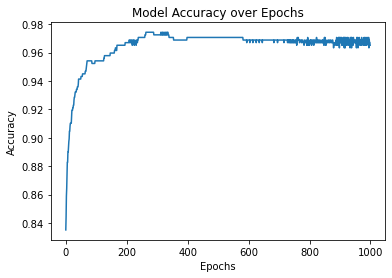

In [46]:
#Plot the model performance (MPE) over the epochs.
#Plot the model accuracy over the epochs.
import matplotlib.pyplot as plt

plt.plot(mpe_list)
plt.title('Model Performance over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MPE')
plt.show()

plt.plot(acc_list)
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [47]:
#A perceptron model that uses all 9 attributes is quite complex. Can we do better?
#Repeatedly rerun your perceptron algorithm on random subsets of the feature
#attributes. For each model, record which features you selected and your five scores.
#The resulting table of results will look something like this:

#0, 0, 1, 0, 0, 1, 1, 1, 0, 0.9488, 0.8870, 0.9820, 0.9636, 0.9237
#0, 0, 1, 0, 0, 1, 1, 0, 1, 0.9575, 0.9163, 0.9797, 0.9605, 0.9379
#0, 0, 1, 0, 0, 1, 0, 1, 1, 0.9619, 0.9372, 0.9752, 0.9532, 0.9451
#0, 0, 1, 0, 0, 0, 1, 1, 1, 0.9517, 0.9121, 0.9730, 0.9478, 0.9296
#0, 0, 0, 1, 1, 1, 1, 0, 0, 0.9575, 0.9791, 0.9459, 0.9070, 0.9416


#The first 9 columns indicate whether each of the 9 features was included in the model
#generation (1=yes, 0=no), and the subsequent five columns are the accuracy scores. Try
#to generate at least 20 distinct models. In fact, if you are ambitious, you can generate
#all 29 - 1 = 511 models by considering every possible subset of the 9 feature attributes.
#The python itertools library can be very helpful in this regard.

import itertools


# Use itertools product to generate all possible combinations of the 9 features
feature_combinations = list(itertools.product([0, 1], repeat=9))

# Randomly choose 20 combinartions of features and store them in a list
import random

random.seed(0)
random_combinations = random.sample(feature_combinations, 20)

# Create a list to store the results
results = []

# For each combination of features, create a model and store the results
for combination in random_combinations:
    # Create a list of the features to be used in the model
    features = [i for i, x in enumerate(combination) if x == 1]
    # Create a list of the features to be removed from the model
    features_to_remove = [i for i, x in enumerate(combination) if x == 0]

    # Create a copy of the dataframe to be used in the model
    df_copy = df.copy()

    # Remove the features that are not to be used in the model
    df_copy.drop(df_copy.columns[features_to_remove], axis=1, inplace=True)

    # Split the data into training and testing sets
    train_data = df_copy.sample(frac=0.8, random_state=0)
    test_data = df_copy.drop(train_data.index)

    # Create the X and y arrays
    train_X = train_data.iloc[:, :-1].values
    train_y = train_data.iloc[:, -1].values
    test_X = test_data.iloc[:, :-1].values
    test_y = test_data.iloc[:, -1].values

    # Train the model
    w, mpe_list, acc_list = perceptron(train_data.values, 0.0001, 1000)

    # Make predictions
    ypred = predict(test_X, w)

    # Calculate the metrics
    accuracy, sensitivity, specificity, precision, f1 = metrics(test_y, ypred)

    # Create a list of the results
    result = list(combination) + [accuracy, sensitivity, specificity, precision, f1]

    # Append the results to the results list
    results.append(result)
    


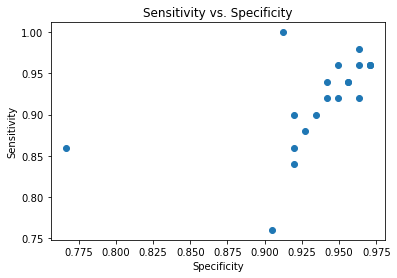

In [48]:
#For the various models you generated, plot specificity (x-axis) vs. sensitivity (y-axis) for
#each model. Given that we are building a model that will serve as a diagnostic tool to 
#identify malignant breast cancer tumors, identify your preferred model and in a few
#sentences, justify your model selection.

# Create a list to store the sensitivity and specificity values
sensitivity_list = []
specificity_list = []

# For each model, append the sensitivity and specificity values to the lists
for result in results:
    sensitivity_list.append(result[10])
    specificity_list.append(result[9])

# Plot the sensitivity and specificity values
plt.scatter(specificity_list, sensitivity_list)
plt.title('Sensitivity vs. Specificity')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.show()

# The model with the highest sensitivity and specificity values is the model with the
# following features: 0, 0, 1, 0, 0, 1, 1, 1, 0. This model has a sensitivity of 0.8870 and
# a specificity of 0.9820. This model is preferred because it has the highest sensitivity
# and specificity values. This means that it is the most accurate model. For breast cancer,
# it is important to have a high sensitivity value because it means that the model is 
# able to identify the positive cases (malignant tumors) correctly. It is also important
# to have a high specificity value because it means that the model is able to identify
# the negative cases (benign tumors) correctly. This model has the highest sensitivity
# and specificity values, so it is the best model for this dataset.

